In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

### Load data

In [3]:
train.sample(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
2123,2275_01,Mars,False,F/460/P,PSO J318.5-22,36.0,False,241.0,0.0,670.0,0.0,0.0,Mos Tirt,False
4563,4857_01,Earth,False,G/782/P,55 Cancri e,19.0,False,423.0,NaN,0.0,0.0,0.0,Elanda Bushins,False
5867,6215_01,Europa,False,B/239/S,55 Cancri e,28.0,False,0.0,809.0,0.0,2043.0,72.0,Mahamak Sterly,True
8416,8989_02,Europa,True,B/291/P,55 Cancri e,16.0,False,0.0,0.0,0.0,0.0,0.0,Dyonon Invebodene,True
6659,7020_01,Earth,True,G/1145/S,TRAPPIST-1e,NaN,False,0.0,0.0,0.0,0.0,0.0,All Buckson,True


In [4]:
test.sample(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
826,1693_01,Earth,False,F/322/S,TRAPPIST-1e,20.0,False,2.0,673.0,NaN,0.0,41.0,Daven Francock
1601,3448_02,Mars,False,F/650/S,PSO J318.5-22,NaN,False,75.0,0.0,1094.0,28.0,0.0,Posts Ple
3537,7673_01,Earth,NaN,F/1593/P,PSO J318.5-22,18.0,False,122.0,399.0,1.0,38.0,27.0,NaN
1741,3701_01,Europa,True,D/125/P,TRAPPIST-1e,30.0,False,0.0,0.0,0.0,0.0,0.0,Anchib Horbox
1957,4226_01,Europa,True,A/36/P,TRAPPIST-1e,26.0,False,0.0,0.0,0.0,0.0,0.0,Aspica Reming


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

### train data exploration

In [7]:
train['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [8]:
train['con_PassId'] = train['PassengerId'].apply(lambda x: int(''.join(x.split('_')))).astype(int)

In [9]:
train['HomePlanet'] = train['HomePlanet'].fillna(method='ffill')
train['HomePlanet'].value_counts()

Earth     4720
Europa    2177
Mars      1796
Name: HomePlanet, dtype: int64

In [10]:
train['Cryo_int_val'] = train['CryoSleep'].replace([False, True], [0, 1])
train['Cryo_int_val'] = train['Cryo_int_val'].fillna(train['Cryo_int_val'].fillna(method='ffill')).astype(int)
train['Cryo_int_val'].value_counts()

0    5582
1    3111
Name: Cryo_int_val, dtype: int64

In [11]:
train['Cabin'] = train['Cabin'].fillna(method='ffill')
train['Cabin_letter'] = train['Cabin'].apply(lambda x: ''.join(x.split('/')[0::2]))
train['Cabin_num'] = train['Cabin'].apply(lambda x: ''.join(x.split('/')[1]))
print(train['Cabin_letter'].value_counts(),
     train['Cabin_num'].value_counts())

FP    1473
FS    1374
GP    1315
GS    1311
ES     459
BS     439
EP     438
CS     415
BP     364
CP     349
DP     251
DS     234
AS     143
AP     123
TP       4
TS       1
Name: Cabin_letter, dtype: int64 82      28
19      24
86      22
97      21
176     21
        ..
1548     1
956      1
1547     1
1544     1
1894     1
Name: Cabin_num, Length: 1817, dtype: int64


In [12]:
train['Destination'] = train['Destination'].fillna(method='ffill')
train['Destination'].value_counts()

TRAPPIST-1e      6037
55 Cancri e      1840
PSO J318.5-22     816
Name: Destination, dtype: int64

In [13]:
train['Age'] = train['Age'].fillna(train['Age'].median())
train['Age'].value_counts()

27.0    438
24.0    324
18.0    320
21.0    311
19.0    293
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: Age, Length: 80, dtype: int64

In [14]:
train['VIP_int_val'] = train['VIP'].replace([False, True], [0, 1])
train['VIP_int_val'] = train['VIP_int_val'].fillna(train['VIP_int_val'].fillna(method='ffill')).astype(int)
train['VIP_int_val'].value_counts()

0    8489
1     204
Name: VIP_int_val, dtype: int64

In [15]:
train['RoomService'] = train['RoomService'].fillna(train['RoomService'].fillna(0))
train['FoodCourt'] = train['FoodCourt'].fillna(train['FoodCourt'].fillna(0))
train['ShoppingMall'] = train['ShoppingMall'].fillna(train['ShoppingMall'].fillna(0))
train['Spa'] = train['Spa'].fillna(train['Spa'].fillna(0))
train['VRDeck'] = train['VRDeck'].fillna(train['VRDeck'].fillna(0))

In [16]:
train['Name'] = train['Name'].fillna(method='ffill')

In [17]:
train['Surname'] = train['Name'].apply(lambda x: x.split(' ')[1])
train['Surname'].value_counts().head(20)

Casonston      18
Oneiles        16
Briggston      15
Domington      15
Litthews       15
Hinglendez     14
Cartez         14
Garnes         14
Browlerson     14
Fulloydez      14
Moodman        14
Barbes         13
Gibbsonton     13
Distured       13
Georgasey      13
Hanner         13
Fowlesterez    13
Ingston        13
Willy          12
Vandan         12
Name: Surname, dtype: int64

In [18]:
train = train.drop(['CryoSleep', 'Cabin', 'VIP'], axis=1)

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   RoomService   8693 non-null   float64
 5   FoodCourt     8693 non-null   float64
 6   ShoppingMall  8693 non-null   float64
 7   Spa           8693 non-null   float64
 8   VRDeck        8693 non-null   float64
 9   Name          8693 non-null   object 
 10  Transported   8693 non-null   bool   
 11  con_PassId    8693 non-null   int64  
 12  Cryo_int_val  8693 non-null   int64  
 13  Cabin_letter  8693 non-null   object 
 14  Cabin_num     8693 non-null   object 
 15  VIP_int_val   8693 non-null   int64  
 16  Surname       8693 non-null   object 
dtypes: bool(1), float64(6), int64(3), object(7)
memory usage: 1.1+ MB


In [20]:
train.isnull().sum()

PassengerId     0
HomePlanet      0
Destination     0
Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
con_PassId      0
Cryo_int_val    0
Cabin_letter    0
Cabin_num       0
VIP_int_val     0
Surname         0
dtype: int64

In [21]:
train

,PassengerId,HomePlanet,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,con_PassId,Cryo_int_val,Cabin_letter,Cabin_num,VIP_int_val,Surname
0,0001_01,Europa,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,101,0,BP,0,0,Ofracculy
1,0002_01,Earth,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,201,0,FS,0,0,Vines
2,0003_01,Europa,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,301,0,AS,0,1,Susent
3,0003_02,Europa,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,302,0,AS,0,0,Susent
4,0004_01,Earth,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,401,0,FS,1,0,Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,55 Cancri e,41.0,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,927601,0,AP,98,1,Noxnuther
8689,9278_01,Earth,PSO J318.5-22,18.0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,927801,1,GS,1499,0,Mondalley
8690,9279_01,Earth,TRAPPIST-1e,26.0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,927901,0,GS,1500,0,Connon
8691,9280_01,Europa,55 Cancri e,32.0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,928001,0,ES,608,0,Hontichre


### dependence of the "transported" feature on other features

In [22]:
pd.pivot_table(train, index='Transported', columns='HomePlanet',
              values='Name', aggfunc='count')

HomePlanet,Earth,Europa,Mars
Transported,,,
False,2716,742,857
True,2004,1435,939


In [23]:
pd.pivot_table(train, index='Transported', columns='Destination',
              values='Name', aggfunc='count')

Destination,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
Transported,,,
False,719,406,3190
True,1121,410,2847


In [24]:
pd.pivot_table(train, index='Transported', columns='Cabin_letter',
              values='Name', aggfunc='count')

Cabin_letter,AP,AS,BP,BS,CP,CS,DP,DS,EP,ES,FP,FS,GP,GS,TP,TS
Transported,,,,,,,,,,,,,,,,
False,68.0,65.0,120.0,97.0,147.0,100.0,148.0,127.0,287.0,286.0,870.0,727.0,724.0,545.0,3.0,1.0
True,55.0,78.0,244.0,342.0,202.0,315.0,103.0,107.0,151.0,173.0,603.0,647.0,591.0,766.0,1.0,NaN


In [25]:
pd.pivot_table(train, index='Transported', columns='VIP_int_val',
              values='Name', aggfunc='count')

VIP_int_val,0,1
Transported,,
False,4191,124
True,4298,80


In [26]:
pd.pivot_table(train, index='Transported', columns='Cryo_int_val',
              values='Name', aggfunc='count')

Cryo_int_val,0,1
Transported,,
False,3721,594
True,1861,2517


In [27]:
pd.pivot_table(train, index=['Transported','Cryo_int_val'], columns='Cabin_letter',
              values='Name', aggfunc='count')

Cabin_letter                AP    AS     BP     BS     CP     CS     DP  \
Transported Cryo_int_val                                                  
False       0             66.0  62.0  113.0   97.0  143.0   99.0  146.0   
            1              2.0   3.0    7.0    NaN    4.0    1.0    2.0   
True        0             24.0  38.0   56.0   95.0   71.0  147.0   56.0   
            1             31.0  40.0  188.0  247.0  131.0  168.0   47.0   

Cabin_letter                 DS     EP     ES     FP     FS     GP     GS  \
Transported Cryo_int_val                                                    
False       0             124.0  255.0  254.0  854.0  717.0  435.0  352.0   
            1               3.0   32.0   32.0   16.0   10.0  289.0  193.0   
True        0              49.0  101.0  102.0  312.0  373.0  173.0  263.0   
            1              58.0   50.0   71.0  291.0  274.0  418.0  503.0   

Cabin_letter               TP   TS  
Transported Cryo_int_val            
False       0             3.0  1.0  
            1             NaN  NaN  
True        0             1.0  NaN  
            1             NaN  NaN

In [28]:
pd.pivot_table(train, index=['Transported','VIP_int_val'], columns='Cabin_letter',
              values='Name', aggfunc='count')

Cabin_letter               AP    AS     BP     BS     CP     CS     DP     DS  \
Transported VIP_int_val                                                         
False       0            55.0  55.0  106.0   90.0  136.0   95.0  132.0  117.0   
            1            13.0  10.0   14.0    7.0   11.0    5.0   16.0   10.0   
True        0            52.0  68.0  232.0  331.0  192.0  299.0  101.0  103.0   
            1             3.0  10.0   12.0   11.0   10.0   16.0    2.0    4.0   

Cabin_letter                EP     ES     FP     FS     GP     GS   TP   TS  
Transported VIP_int_val                                                      
False       0            284.0  278.0  853.0  718.0  723.0  545.0  3.0  1.0  
            1              3.0    8.0   17.0    9.0    1.0    NaN  NaN  NaN  
True        0            149.0  171.0  600.0  644.0  591.0  764.0  1.0  NaN  
            1              2.0    2.0    3.0    3.0    NaN    2.0  NaN  NaN

In [29]:
pd.pivot_table(train, index=['Transported','HomePlanet'], columns='Cabin_letter',
              values='Name', aggfunc='count')

Cabin_letter              AP    AS     BP     BS     CP     CS     DP    DS  \
Transported HomePlanet                                                        
False       Earth        2.0   2.0    3.0    NaN    2.0    4.0    1.0   2.0   
            Europa      65.0  63.0  116.0   96.0  144.0   96.0   34.0  46.0   
            Mars         1.0   NaN    1.0    1.0    1.0    NaN  113.0  79.0   
True        Earth        NaN   2.0    4.0    4.0    NaN    2.0    2.0   NaN   
            Europa      55.0  76.0  239.0  338.0  202.0  312.0   57.0  54.0   
            Mars         NaN   NaN    1.0    NaN    NaN    1.0   44.0  53.0   

Cabin_letter               EP     ES     FP     FS     GP     GS   TP   TS  
Transported HomePlanet                                                      
False       Earth       128.0  136.0  656.0  532.0  710.0  537.0  1.0  NaN  
            Europa       25.0   35.0    4.0    5.0    6.0    4.0  2.0  1.0  
            Mars        134.0  115.0  210.0  190.0    8.0    4.0  NaN  NaN  
True        Earth        82.0   74.0  209.0  289.0  582.0  754.0  NaN  NaN  
            Europa       40.0   36.0    7.0    4.0    7.0    7.0  1.0  NaN  
            Mars         29.0   63.0  387.0  354.0    2.0    5.0  NaN  NaN

In [30]:
pd.pivot_table(train, index=['Transported','Destination'], columns='Cabin_letter',
              values='Name', aggfunc='count')

Cabin_letter                 AP    AS     BP     BS     CP     CS     DP  \
Transported Destination                                                    
False       55 Cancri e    29.0  21.0   47.0   35.0   59.0   41.0   24.0   
            PSO J318.5-22   NaN   1.0    2.0    NaN    3.0    1.0    6.0   
            TRAPPIST-1e    39.0  43.0   71.0   62.0   85.0   58.0  118.0   
True        55 Cancri e    28.0  36.0  113.0  149.0   98.0  127.0   33.0   
            PSO J318.5-22   NaN   2.0    1.0    1.0    4.0    7.0    3.0   
            TRAPPIST-1e    27.0  40.0  130.0  192.0  100.0  181.0   67.0   

Cabin_letter                 DS     EP     ES     FP     FS     GP     GS  \
Transported Destination                                                     
False       55 Cancri e    23.0   17.0   36.0  135.0  109.0   78.0   65.0   
            PSO J318.5-22   5.0    8.0    9.0   96.0   86.0  104.0   85.0   
            TRAPPIST-1e    99.0  262.0  241.0  639.0  532.0  542.0  395.0   
True        55 Cancri e    38.0   37.0   34.0   88.0   95.0  104.0  141.0   
            PSO J318.5-22   3.0   14.0   13.0   32.0   41.0  143.0  146.0   
            TRAPPIST-1e    66.0  100.0  126.0  483.0  511.0  344.0  479.0   

Cabin_letter                TP   TS  
Transported Destination              
False       55 Cancri e    NaN  NaN  
            PSO J318.5-22  NaN  NaN  
            TRAPPIST-1e    3.0  1.0  
True        55 Cancri e    NaN  NaN  
            PSO J318.5-22  NaN  NaN  
            TRAPPIST-1e    1.0  NaN

### feature visualization

<AxesSubplot:xlabel='HomePlanet', ylabel='Count'>

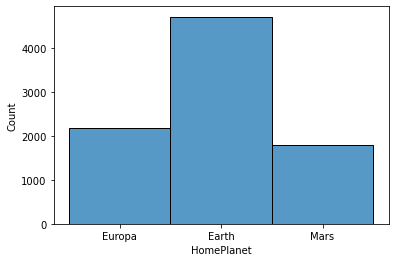

In [31]:
sns.histplot(x='HomePlanet', data=train)

<AxesSubplot:xlabel='Cryo_int_val', ylabel='Count'>

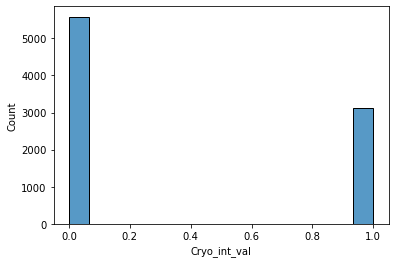

In [32]:
sns.histplot(x='Cryo_int_val', data=train)

<AxesSubplot:xlabel='Cabin_letter', ylabel='Count'>

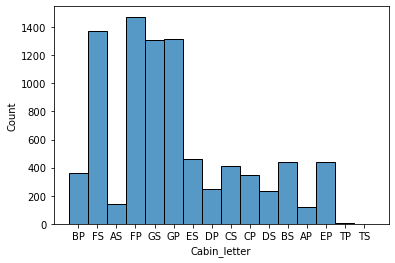

In [33]:
sns.histplot(x='Cabin_letter', data=train)

<AxesSubplot:xlabel='Destination', ylabel='Count'>

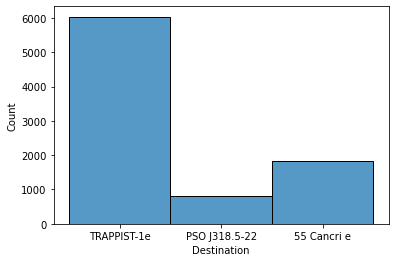

In [34]:
sns.histplot(x='Destination', data=train)

<AxesSubplot:xlabel='VIP_int_val', ylabel='Count'>

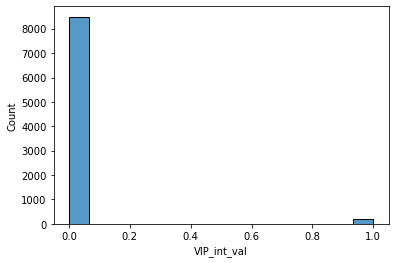

In [35]:
sns.histplot(x='VIP_int_val', data=train)

<AxesSubplot:xlabel='Age', ylabel='Count'>

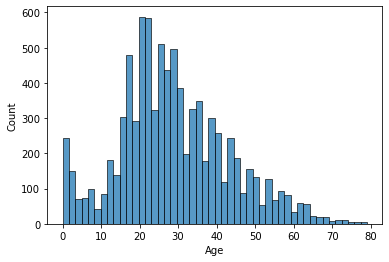

In [36]:
sns.histplot(x='Age', data=train)

<AxesSubplot:xlabel='Transported', ylabel='count'>

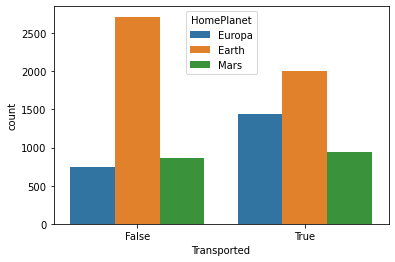

In [37]:
sns.countplot(x='Transported', data=train, hue='HomePlanet')

<AxesSubplot:xlabel='Transported', ylabel='count'>

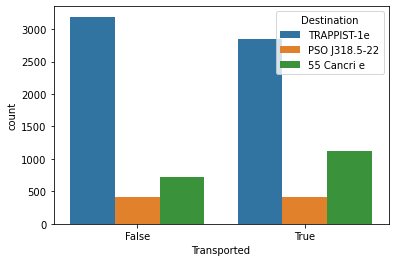

In [38]:
sns.countplot(x='Transported', data=train, hue='Destination')

<AxesSubplot:xlabel='Transported', ylabel='count'>

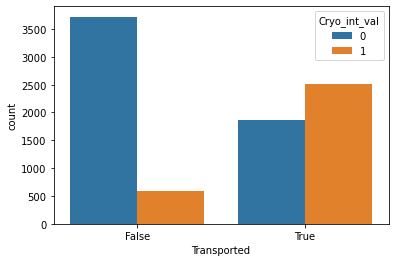

In [39]:
sns.countplot(x='Transported', data=train, hue='Cryo_int_val')

<AxesSubplot:xlabel='Cabin_letter', ylabel='count'>

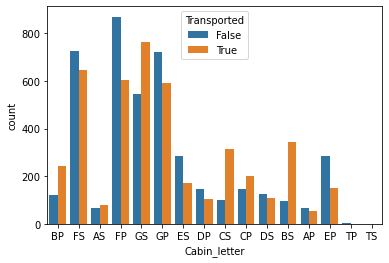

In [40]:
sns.countplot(x='Cabin_letter', data=train, hue='Transported')

<AxesSubplot:xlabel='Transported', ylabel='count'>

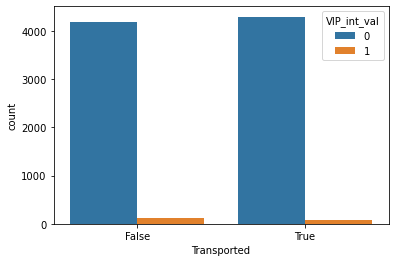

In [41]:
sns.countplot(x='Transported', data=train, hue='VIP_int_val')

<AxesSubplot:>

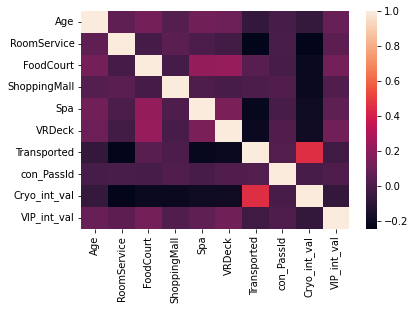

In [42]:
sns.heatmap(train.corr())

### data preprocessing

In [43]:
train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [44]:
train['train_test'] = 1
test['train_test'] = 0
test['Transported'] = np.dtype(bool)
space_titanic = pd.concat([train,test])

In [45]:
space_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   12970 non-null  object 
 14  train_test    12970 non-null  int64  
dtypes: float64(6), int64(1), object(8)
memory usage: 1.6+ MB


In [46]:
space_titanic.isnull().sum()

PassengerId       0
HomePlanet      288
CryoSleep       310
Cabin           299
Destination     274
Age             270
VIP             296
RoomService     263
FoodCourt       289
ShoppingMall    306
Spa             284
VRDeck          268
Name            294
Transported       0
train_test        0
dtype: int64

In [47]:
space_titanic['PassengerId'] = space_titanic['PassengerId'].apply(lambda x: int(''.join(x.split('_')))).astype(int)

In [48]:
space_titanic['HomePlanet'] = space_titanic['HomePlanet'].fillna(method='ffill')
space_titanic['HomePlanet'].value_counts()

Earth     7034
Europa    3198
Mars      2738
Name: HomePlanet, dtype: int64

In [49]:
space_titanic['Cryo_int_val'] = space_titanic['CryoSleep'].replace([False, True], [0, 1])
space_titanic['Cryo_int_val'] = space_titanic['Cryo_int_val'].fillna(space_titanic['Cryo_int_val'].fillna(method='ffill')).astype(int)
space_titanic['Cryo_int_val'].value_counts()

0    8279
1    4691
Name: Cryo_int_val, dtype: int64

In [50]:
space_titanic['Cabin'] = space_titanic['Cabin'].fillna(method='ffill')
space_titanic['Cabin_letter'] = space_titanic['Cabin'].apply(lambda x: ''.join(x.split('/')[0::2]))
space_titanic['Cabin_num'] = space_titanic['Cabin'].apply(lambda x: ''.join(x.split('/')[1]))
print(space_titanic['Cabin_letter'].value_counts(),
     space_titanic['Cabin_num'].value_counts())

FP    2233
FS    2097
GS    1941
GP    1935
ES     698
EP     653
BS     648
CS     583
CP     547
BP     525
DP     376
DS     358
AS     193
AP     172
TS       6
TP       5
Name: Cabin_letter, dtype: int64 82      34
56      29
4       29
31      28
230     27
        ..
1853     1
1848     1
1847     1
1846     1
1890     1
Name: Cabin_num, Length: 1894, dtype: int64


In [51]:
space_titanic['Destination'] = space_titanic['Destination'].fillna(method='ffill')
space_titanic['Destination'].value_counts()

TRAPPIST-1e      9060
55 Cancri e      2698
PSO J318.5-22    1212
Name: Destination, dtype: int64

In [52]:
space_titanic['Age'] = space_titanic['Age'].fillna(train['Age'].median())
space_titanic['Age'].value_counts()

27.0    656
18.0    496
24.0    482
21.0    468
19.0    455
       ... 
75.0      6
79.0      5
78.0      4
77.0      3
76.0      2
Name: Age, Length: 80, dtype: int64

In [53]:
space_titanic['VIP_int_val'] = space_titanic['VIP'].replace([False, True], [0, 1])
space_titanic['VIP_int_val'] = space_titanic['VIP_int_val'].fillna(space_titanic['VIP_int_val'].fillna(method='ffill')).astype(int)
space_titanic['VIP_int_val'].value_counts()

0    12692
1      278
Name: VIP_int_val, dtype: int64

In [54]:
space_titanic['RoomService'] = np.log(space_titanic['RoomService']+1)
space_titanic['RoomService'] = space_titanic['RoomService'].fillna(space_titanic['RoomService'].fillna(0))
space_titanic['FoodCourt'] = space_titanic['FoodCourt'].fillna(space_titanic['FoodCourt'].fillna(0))
space_titanic['FoodCourt'] = np.log(space_titanic['FoodCourt']+1)
space_titanic['ShoppingMall'] = space_titanic['ShoppingMall'].fillna(space_titanic['ShoppingMall'].fillna(0))
space_titanic['ShoppingMall'] = np.log(space_titanic['ShoppingMall']+1)
space_titanic['Spa'] = space_titanic['Spa'].fillna(space_titanic['Spa'].fillna(0))
space_titanic['Spa'] = np.log(space_titanic['Spa']+1)
space_titanic['VRDeck'] = space_titanic['VRDeck'].fillna(space_titanic['VRDeck'].fillna(0))
space_titanic['VRDeck'] = np.log(space_titanic['VRDeck']+1)

In [55]:
space_titanic['Name'] = space_titanic['Name'].fillna(method='ffill')

In [56]:
space_titanic['Surname'] = space_titanic['Name'].apply(lambda x: x.split(' ')[1])
space_titanic['Surname'].value_counts().head(20)

Buckentry      21
Belley         20
Hinglendez     19
Mclardson      19
Fowlesterez    19
Briggston      18
Casonston      18
Georgasey      17
Domington      17
Gibbsonton     17
Haydenzier     17
Gainebergan    16
Vloaf          16
Oneiles        16
Castannison    16
Litthews       16
Dickley        16
Rilley         15
Clemondsey     15
Tranklinay     15
Name: Surname, dtype: int64

In [57]:
space_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  int64  
 1   HomePlanet    12970 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12970 non-null  object 
 4   Destination   12970 non-null  object 
 5   Age           12970 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12970 non-null  float64
 8   FoodCourt     12970 non-null  float64
 9   ShoppingMall  12970 non-null  float64
 10  Spa           12970 non-null  float64
 11  VRDeck        12970 non-null  float64
 12  Name          12970 non-null  object 
 13  Transported   12970 non-null  object 
 14  train_test    12970 non-null  int64  
 15  Cryo_int_val  12970 non-null  int64  
 16  Cabin_letter  12970 non-null  object 
 17  Cabin_num     12970 non-null  object 
 18  VIP_int_val   12970 non-nul

In [58]:
space_titanic.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       310
Cabin             0
Destination       0
Age               0
VIP             296
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name              0
Transported       0
train_test        0
Cryo_int_val      0
Cabin_letter      0
Cabin_num         0
VIP_int_val       0
Surname           0
dtype: int64

In [59]:
features = ['HomePlanet','Destination','Age','RoomService','FoodCourt',
    'ShoppingMall','Spa','train_test',
    'Cryo_int_val','Cabin_letter','VIP_int_val']
Vector_object = pd.get_dummies(space_titanic[features])

In [60]:
Vector_object.sample(10)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,train_test,Cryo_int_val,VIP_int_val,HomePlanet_Earth,HomePlanet_Europa,...,Cabin_letter_DP,Cabin_letter_DS,Cabin_letter_EP,Cabin_letter_ES,Cabin_letter_FP,Cabin_letter_FS,Cabin_letter_GP,Cabin_letter_GS,Cabin_letter_TP,Cabin_letter_TS
2728,5.0,0.000000,0.000000,0.0,0.000000,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
6181,21.0,0.000000,0.000000,0.0,0.000000,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
5741,36.0,0.000000,0.000000,0.0,0.000000,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8347,19.0,0.000000,0.000000,0.0,0.000000,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1431,57.0,0.000000,0.000000,0.0,0.000000,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1896,20.0,0.000000,0.000000,0.0,0.000000,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
6923,16.0,0.000000,0.000000,0.0,0.000000,1,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2565,27.0,0.000000,0.000000,0.0,0.000000,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1063,34.0,0.000000,0.000000,0.0,0.000000,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1341,37.0,5.796058,8.724858,0.0,3.295837,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [61]:
X = Vector_object[Vector_object.train_test == 1].drop(['train_test'],axis=1)
X.shape

(8693, 29)

In [62]:
X

,Age,RoomService,FoodCourt,ShoppingMall,Spa,Cryo_int_val,VIP_int_val,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Cabin_letter_DP,Cabin_letter_DS,Cabin_letter_EP,Cabin_letter_ES,Cabin_letter_FP,Cabin_letter_FS,Cabin_letter_GP,Cabin_letter_GS,Cabin_letter_TP,Cabin_letter_TS
0,39.0,0.000000,0.000000,0.000000,0.000000,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,24.0,4.700480,2.302585,3.258097,6.309918,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,58.0,3.784190,8.182280,0.000000,8.812248,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,33.0,0.000000,7.157735,5.918894,8.110728,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,16.0,5.717028,4.262680,5.023881,6.338594,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.000000,8.827615,0.000000,7.404888,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8689,18.0,0.000000,0.000000,0.000000,0.000000,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8690,26.0,0.000000,0.000000,7.535297,0.693147,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8691,32.0,0.000000,6.956545,0.000000,5.869297,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [63]:
X_t = Vector_object[Vector_object.train_test == 0].drop(['train_test'],axis=1)
X_t.shape

(4277, 29)

In [64]:
y = space_titanic[space_titanic.train_test == 1].Transported
y = y.astype(int)

### build model

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [67]:
lr = LogisticRegression(max_iter=2000)
lr.fit(X_train,y_train)
print('Train score: ', lr.score(X_train, y_train))
print('Test score: ', lr.score(X_test, y_test))

Train score:  0.7568306010928961
Test score:  0.7418056354226567


### Grid Search

In [68]:
params = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}
lr = LogisticRegression()
lr_grid = GridSearchCV(lr, param_grid=params,cv=5,verbose=True,n_jobs=-1)
lr_grid.fit(X_train,y_train)
print(lr_grid.best_score_)
print(lr_grid.best_estimator_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
0.7546755349135502
LogisticRegression(C=1.623776739188721, max_iter=2000, solver='liblinear')


In [69]:
lr_best = lr_grid.best_estimator_
print("Train scores: ", lr_best.score(X_train, y_train))
print("Test scores: ", lr_best.score(X_test, y_test))

Train scores:  0.7561115904515386
Test scores:  0.7429557216791259


In [70]:
y_predict = lr_best.predict(X_t).astype(bool)
PassID = test['PassengerId']

### download predict data

In [71]:
submission_lr = pd.DataFrame({'PassengerId': PassID, 'Transported': y_predict})

In [72]:
submission_lr.to_csv('/kaggle/working/submission.csv', index=False)